In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [24]:
df=pd.read_csv('../datasets/final_merged_data.csv')

In [25]:
df.columns

Index(['year', 'county code', 'county', 'harvested acres', 'yield',
       'production', 'price p/u', 'value', 'annual_precip', 'annual_tavg',
       'annual_tmin', 'annual_tmax', 'annual_var', 'season_precip',
       'season_tavg', 'season_tmin', 'season_tmax', 'season_var'],
      dtype='object')

In [26]:
# Move to EDA / Feature Engineering notebook:
df=pd.get_dummies(df, columns=['county'], drop_first=True)

# Model Setup

In [27]:
# Start with climate features to include
features=['annual_tmax','season_tavg','annual_precip','annual_tavg','annual_tmin']

# Add in dummy columns
for col in df.columns:
    if col.startswith('county_'):
        features.append(col)

features

['annual_tmax',
 'season_tavg',
 'annual_precip',
 'annual_tavg',
 'annual_tmin',
 'county_Madera',
 'county_Monterey',
 'county_Napa',
 'county_Sacramento',
 'county_San Joaquin',
 'county_San Luis Obispo',
 'county_Santa Barbara',
 'county_Sonoma',
 'county_Yolo']

In [28]:
list(features)

['annual_tmax',
 'season_tavg',
 'annual_precip',
 'annual_tavg',
 'annual_tmin',
 'county_Madera',
 'county_Monterey',
 'county_Napa',
 'county_Sacramento',
 'county_San Joaquin',
 'county_San Luis Obispo',
 'county_Santa Barbara',
 'county_Sonoma',
 'county_Yolo']

In [29]:
# Define X and y
X=df[features]
y=df['yield']

In [30]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [31]:
# Scale data (to be used as needed)
ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

# Model Selection

We will evaluate the performance of the following models:
> I. Linear Regression <br>
> II. K-Nearest Neighbors <br>
> III. Random Forest <br>
> IV. AdaBoost <br>
> V. GradientBoost

### i. Linear Regression

In [32]:
# Non scaled data
lr=LinearRegression()
lr.fit(X_train,y_train)

cv_score=cross_val_score(lr,X_train,y_train).mean()
train_score=lr.score(X_train,y_train)
test_score=lr.score(X_test,y_test)

print(f'Linear Regression Cross Val Score: {cv_score}.')
print(f'Linear Regression Train Score: {train_score}.')
print(f'Linear Regression Test Score: {test_score}.')

Linear Regression Cross Val Score: 0.8482443771217826.
Linear Regression Train Score: 0.8844521273732713.
Linear Regression Test Score: 0.8868050097500645.


In [33]:
# Scaled Data
lr=LinearRegression()
lr.fit(X_train_sc,y_train)

cv_score=cross_val_score(lr,X_train_sc,y_train).mean()
train_score=lr.score(X_train_sc,y_train)
test_score=lr.score(X_test_sc,y_test)

print(f'Linear Regression Cross Val Score: {cv_score}.')
print(f'Linear Regression Train Score: {train_score}.')
print(f'Linear Regression Test Score: {test_score}.')

Linear Regression Cross Val Score: 0.848244377121782.
Linear Regression Train Score: 0.8844521273732713.
Linear Regression Test Score: 0.8868050097500642.


### ii. K-Nearest Neighbors

In [34]:
# Scaled data
knn=KNeighborsRegressor()
knn.fit(X_train_sc,y_train)

cv_score=cross_val_score(knn,X_train_sc,y_train).mean()
train_score=knn.score(X_train_sc,y_train)
test_score=knn.score(X_test_sc,y_test)

print(f'KNN Cross Val Score: {cv_score}.')
print(f'KNN Train Score: {train_score}.')
print(f'KNN Test Score: {test_score}.')

KNN Cross Val Score: 0.8303316525828542.
KNN Train Score: 0.8916866451074688.
KNN Test Score: 0.8692708859279467.


### III. Random Forest

In [35]:
# Non scaled data
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

cv_score=cross_val_score(rf,X_train,y_train).mean()
train_score=rf.score(X_train,y_train)
test_score=rf.score(X_test,y_test)

print(f'Random Forest Cross Val Score: {cv_score}.')
print(f'Random Forest Train Score: {train_score}.')
print(f'Random Forest Test Score: {test_score}.')

Random Forest Cross Val Score: 0.6863895206137414.
Random Forest Train Score: 0.9598728899081735.
Random Forest Test Score: 0.3811663783511605.


In [36]:
# Scaled data
rf=RandomForestRegressor()
rf.fit(X_train_sc,y_train)

cv_score=cross_val_score(rf,X_train_sc,y_train).mean()
train_score=rf.score(X_train_sc,y_train)
test_score=rf.score(X_test_sc,y_test)

print(f'Random Forest Cross Val Score: {cv_score}.')
print(f'Random Forest Train Score: {train_score}.')
print(f'Random Forest Test Score: {test_score}.')

Random Forest Cross Val Score: 0.6982458506205357.
Random Forest Train Score: 0.9653930687784144.
Random Forest Test Score: 0.40776954619819983.


### IV. AdaBoost

In [37]:
# Non scaled data
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

cv_score=cross_val_score(ada,X_train,y_train).mean()
train_score=ada.score(X_train,y_train)
test_score=ada.score(X_test,y_test)

print(f'AdaBoost Cross Val Score: {cv_score}.')
print(f'AdaBoost Train Score: {train_score}.')
print(f'AdaBoost Test Score: {test_score}.')

AdaBoost Cross Val Score: 0.736351396087185.
AdaBoost Train Score: 0.9109017137642503.
AdaBoost Test Score: 0.5063240567109979.


In [38]:
# Scaled data
ada=AdaBoostRegressor()
ada.fit(X_train_sc,y_train)

cv_score=cross_val_score(ada,X_train_sc,y_train).mean()
train_score=ada.score(X_train_sc,y_train)
test_score=ada.score(X_test_sc,y_test)

print(f'AdaBoost Cross Val Score: {cv_score}.')
print(f'AdaBoost Train Score: {train_score}.')
print(f'AdaBoost Test Score: {test_score}.')

AdaBoost Cross Val Score: 0.6938815454137732.
AdaBoost Train Score: 0.9218318961081072.
AdaBoost Test Score: 0.562250642187062.


### V. GradientBoost

In [39]:
# Non scaled data
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

cv_score=cross_val_score(gb,X_train,y_train).mean()
train_score=gb.score(X_train,y_train)
test_score=gb.score(X_test,y_test)

print(f'GradientBoost Cross Val Score: {cv_score}.')
print(f'GradientBoost Train Score: {train_score}.')
print(f'GradientBoost Test Score: {test_score}.')

GradientBoost Cross Val Score: 0.6964036132470902.
GradientBoost Train Score: 0.9861858851023199.
GradientBoost Test Score: 0.42164930151418567.


In [40]:
# Scaled data
gb=GradientBoostingRegressor()
gb.fit(X_train_sc,y_train)

cv_score=cross_val_score(gb,X_train_sc,y_train).mean()
train_score=gb.score(X_train_sc,y_train)
test_score=gb.score(X_test_sc,y_test)

print(f'GradientBoost Cross Val Score: {cv_score}.')
print(f'GradientBoost Train Score: {train_score}.')
print(f'GradientBoost Test Score: {test_score}.')

GradientBoost Cross Val Score: 0.7098311627033598.
GradientBoost Train Score: 0.9861858851023199.
GradientBoost Test Score: 0.4427371657276268.


### Results

Based on the high performance across all three scores, we have determined Linear Regression to be the best model to proceed with. For interpretibility of results, and because there is minimal observed difference between running the model on the scaled and unscaled data, we will use unscaled data.

# Model Refinement

In [41]:
# GridSearch to find best parameters
params={
    'fit_intercept':[True,False],
    'normalize':[True,False],
}

gs=GridSearchCV(LinearRegression(),param_grid=params)
gs.fit(X_train,y_train)
print(gs.best_score_)
gs.best_params_

0.8482443771217826


{'fit_intercept': True, 'normalize': False}

Default parameters are determined to be the best parameters.

# Production Model

In [42]:
# Instantiate and fit model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
coef_df=pd.DataFrame({"column":X.columns, "coef":lr.coef_})
coef_df=coef_df.sort_values("coef")
coef_df

,column,coef
7,county_Napa,-8.253431
10,county_San Luis Obispo,-7.793579
11,county_Santa Barbara,-7.728613
12,county_Sonoma,-7.543616
6,county_Monterey,-7.517149
9,county_San Joaquin,-5.122328
13,county_Yolo,-4.792131
8,county_Sacramento,-4.408429
5,county_Madera,-1.179247
1,season_tavg,-0.183688


In [44]:
plt.rcParams['figure.figsize'] = (10, 10)

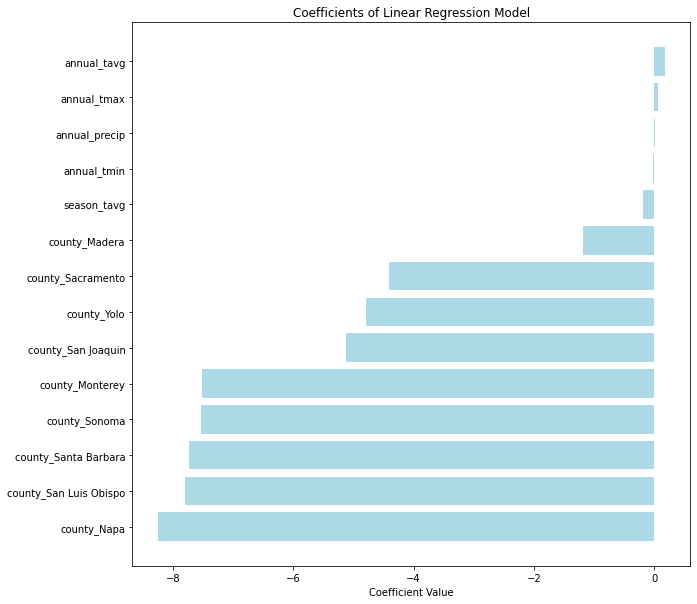

In [45]:
plt.barh(coef_df["column"],coef_df["coef"],color="lightblue")
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value');

#### Performance on Test Data

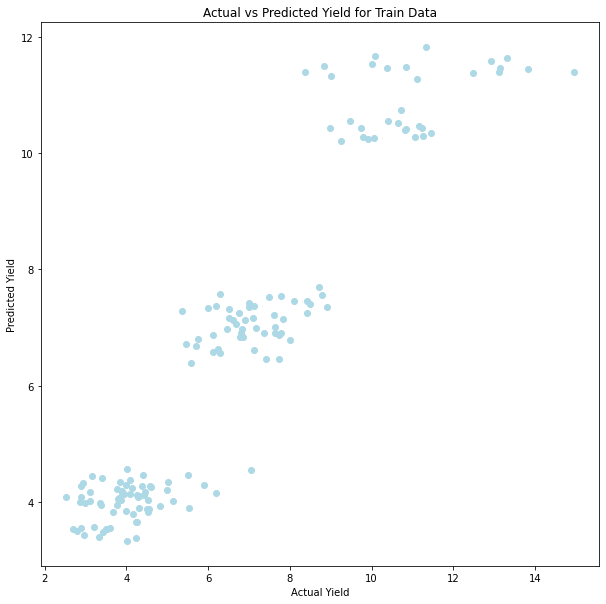

In [46]:
plt.scatter(y_train,lr.predict(X_train),color='lightblue')
plt.title('Actual vs Predicted Yield for Train Data')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield');

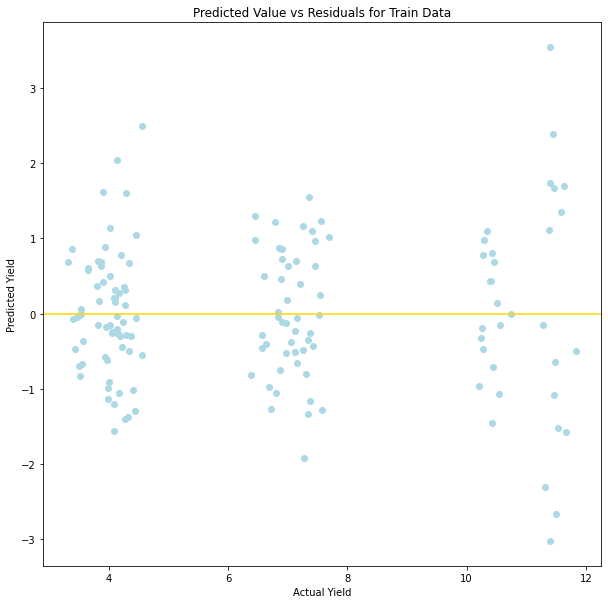

In [47]:
residuals=y_train-lr.predict(X_train)

plt.scatter(lr.predict(X_train),residuals,color='lightblue')
plt.title('Predicted Value vs Residuals for Train Data')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.axhline(0,color="gold");

#### Performance on Test Data

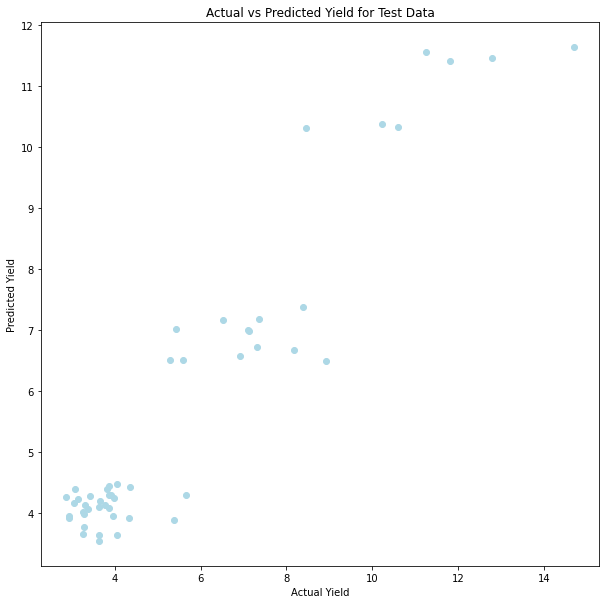

In [48]:
plt.scatter(y_test,lr.predict(X_test),color='lightblue')
plt.title('Actual vs Predicted Yield for Test Data')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield');

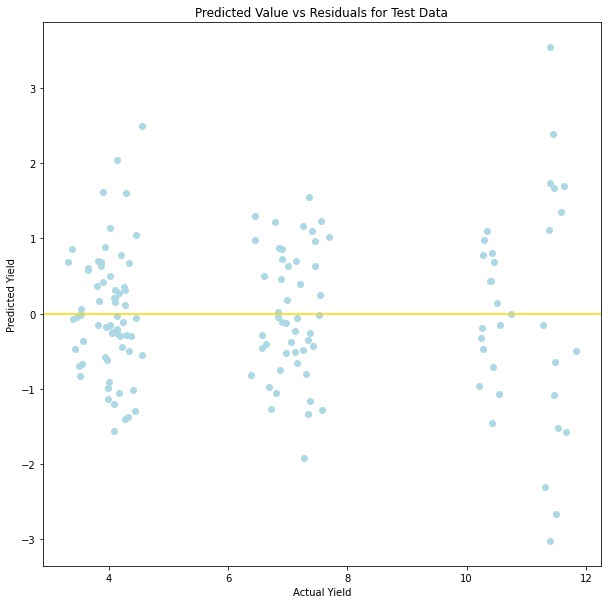

In [49]:
residuals=y_train-lr.predict(X_train)

plt.scatter(lr.predict(X_train),residuals,color='lightblue')
plt.title('Predicted Value vs Residuals for Test Data')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.axhline(0,color="gold");